In [ ]:
pip install numba==0.53

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os.path as path
import raw_data_preprocessing as rdp
import warnings

warnings.filterwarnings('ignore')

googledrive_loc = '/datasets/googledrive'
data_folder_loc = 'Yi_UCI_research/GSR other works/2020 Summer_predict individual training/data/saved data/2022/10features/'
data_path = path.join(googledrive_loc, data_folder_loc)

import classification as clf
X, Y, orig_len, feature_names = clf.read_inputs(data_path,['train_x.array','train_y.array','original_len.int','feature_names.list'])
print('The input and output shape: {} and {}'.format(X.shape, Y.shape))

The input and output shape: (332, 10) and (332,)


In [ ]:
feature_names

['VGQHoursCategorySumPastYear_Z',
 'Avg_grit_amb',
 'NEOFFIIntellectorOpenness',
 'NEOFFIEmotionalstability',
 'MR_accpre',
 'NT_Zpre',
 'IC_Zreverse_pre',
 'NEOFFIConscientiousness',
 'WM_Zpre',
 'NEOFFIExtraversion']

shuffle

In [ ]:
feature_names_new = ['Working memory','Fluid reasoning','Video game background','Updating','Grit&Ambition','Conscientiousness','Neuroticism','SES','Openness','Cognitive failure','Growth mindset','Agreeableness','Extraversion','Inhibitory control']

In [ ]:
# clf.save_data(data_path, shuffle_list, 'shuffle.list')

In [ ]:
# shuffle_list = clf.read_inputs(data_path, ['shuffle.list'])

In [ ]:
#X = X[:orig_len]
#result = []
#acc = []
#for i in range(111, 120):
#    Y = shuffle_list[0][i]
#    classify_test = clf.ClassificationProcessor(X,Y, orig_len, feature_names)
#    final_accuracies, final_pred_y, final_prob_y, class0_acc, class1_acc, class2_acc, kappa = classify_test.final_model('Random Forest', [0, 1, 2,3,4,5,6,7,8])
#    result.append(kappa)
#    acc.append([class0_acc, class1_acc, class2_acc])
#    print(i)

In [ ]:
#import pandas as pd
#pd.DataFrame(result).to_csv(data_path+'result_shuffle.csv')
#pd.DataFrame(acc).to_csv(data_path+'acc_shuffle.csv')

classification

In [ ]:
classify_test = clf.ClassificationProcessor(X,Y, orig_len, feature_names)
# classify_test.get_stacking()

model selection and feature selection

Logitic Reg Accuracy: 0.405 (0.067)
f1 score: 0.303
precision: 0.387
recall: 0.337
One-vs-Rest ROC AUC scores:
0.543136 (macro),
0.553012 (weighted by prevalence)
The cogen kappa score is : 0.007962513369891844


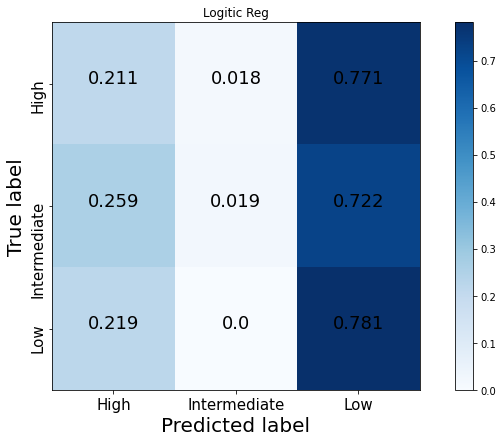

<Figure size 432x432 with 0 Axes>

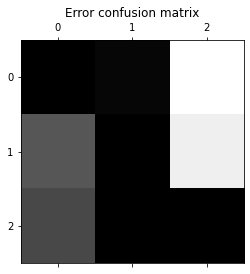

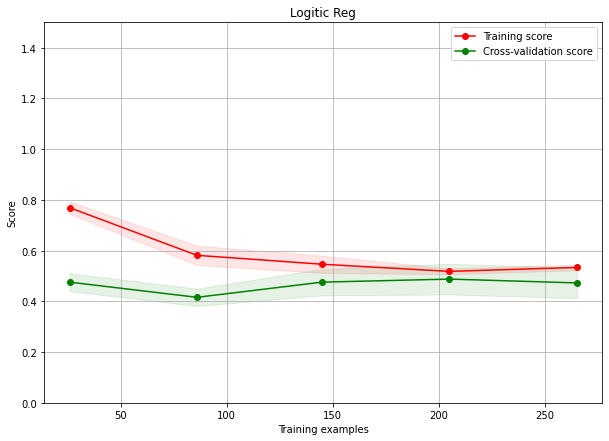

Nearest Neighbors Accuracy: 0.432 (0.049)
f1 score: 0.362
precision: 0.390
recall: 0.365
One-vs-Rest ROC AUC scores:
0.525593 (macro),
0.516451 (weighted by prevalence)
The cogen kappa score is : 0.04219450085420495


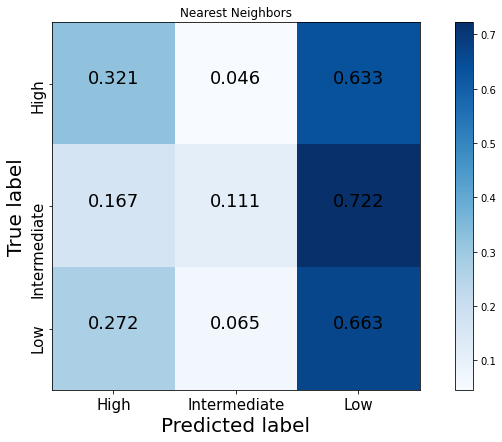

<Figure size 432x432 with 0 Axes>

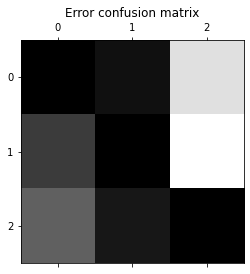

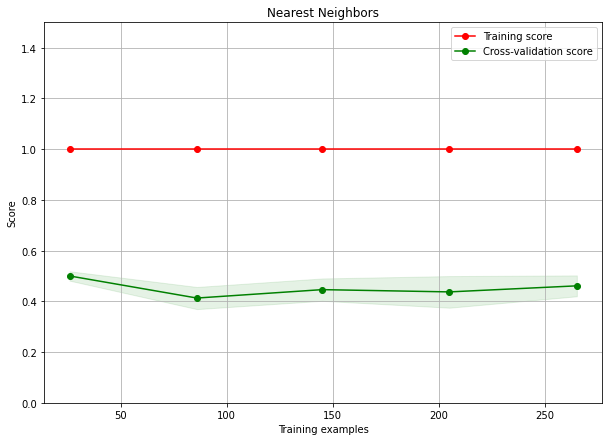

Random Forest Accuracy: 0.434 (0.042)
f1 score: 0.376
precision: 0.387
recall: 0.374
One-vs-Rest ROC AUC scores:
0.552866 (macro),
0.543458 (weighted by prevalence)
The cogen kappa score is : 0.05122231541018252


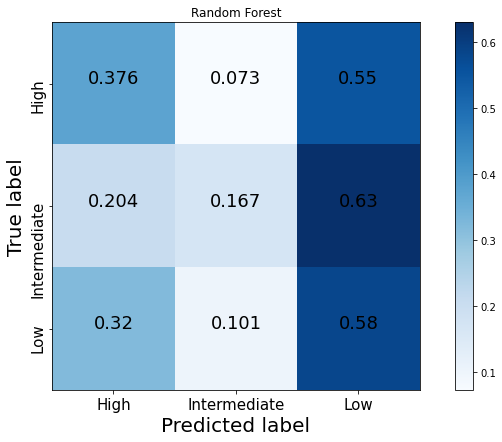

<Figure size 432x432 with 0 Axes>

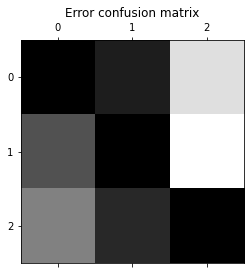

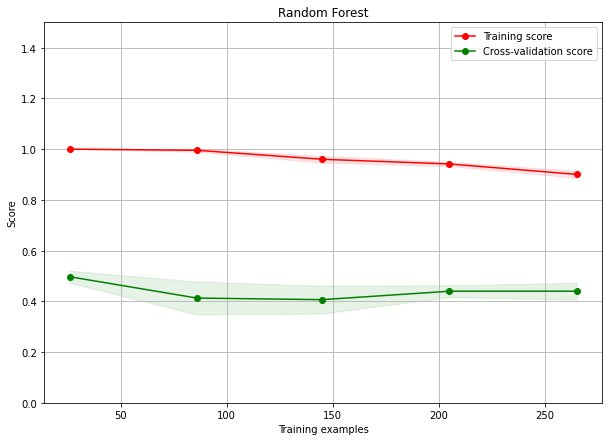

MLP Accuracy: 0.434 (0.067)
f1 score: 0.335
precision: 0.336
recall: 0.336
One-vs-Rest ROC AUC scores:
0.538680 (macro),
0.532357 (weighted by prevalence)
The cogen kappa score is : 0.0069353821791470205


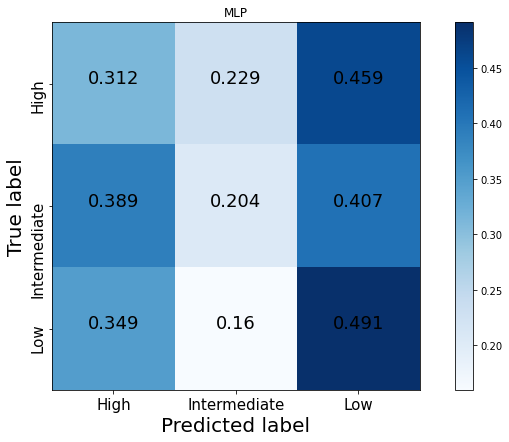

<Figure size 432x432 with 0 Axes>

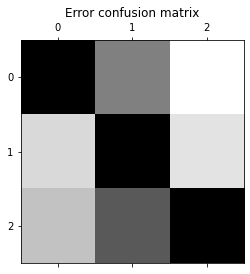

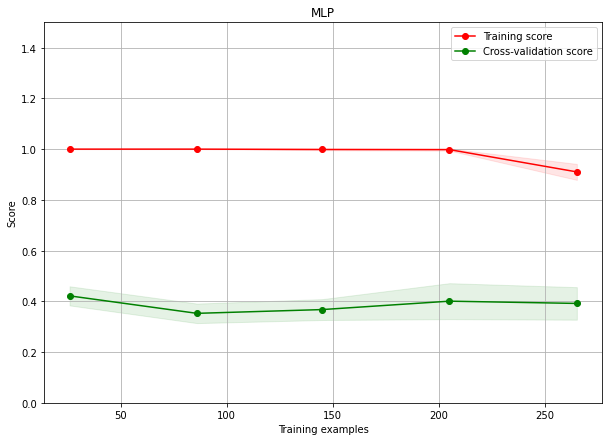

In [ ]:
classify_test.model_selection(10)

In [ ]:
# classify_test.exhausive_feature_selection('Nearest Neighbors')
# classify_test.exhausive_feature_selection('Random Forest')
# classify_test.feature_selection('Random Forest')

ValueError: If custom_feature_names is not None, the number of elements in custom_feature_names must equal the number of columns in X.

final model

In [ ]:
# final_accuracies, final_pred_y, final_prob_y, class0_acc, class1_acc, class2_acc, kappa = classify_test.final_model('Random Forest', [0, 1, 2,3,4,5,6,7,8])

In [ ]:
# final_accuracies, final_pred_y, final_prob_y = classify_test.final_model('Nearest Neighbors', [0, 1, 4, 6, 7, 9, 10, 12, 13])

shap

[0.33333333 0.33333333 0.33333333]


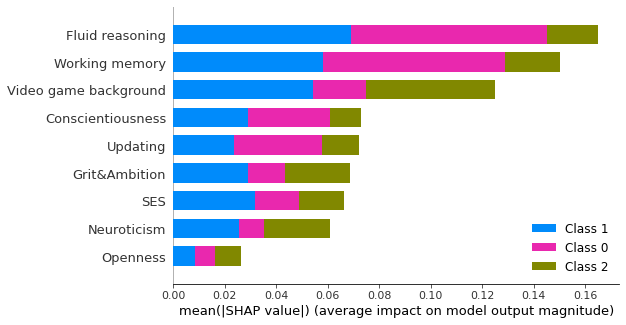

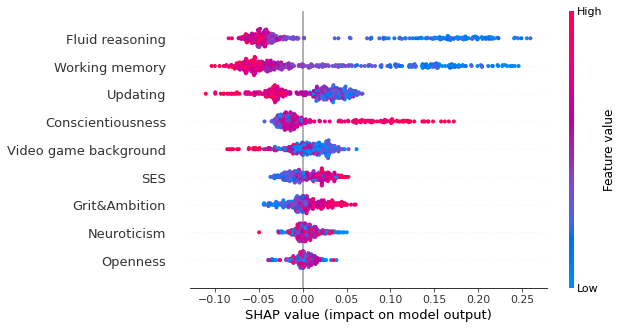

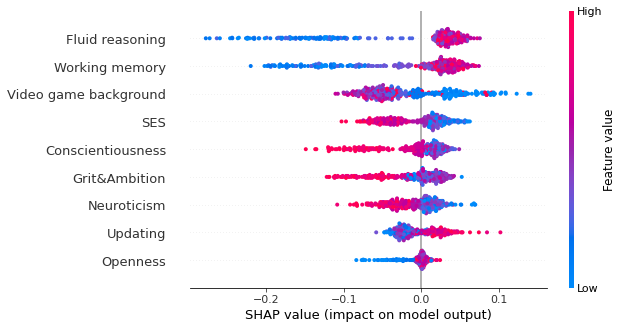

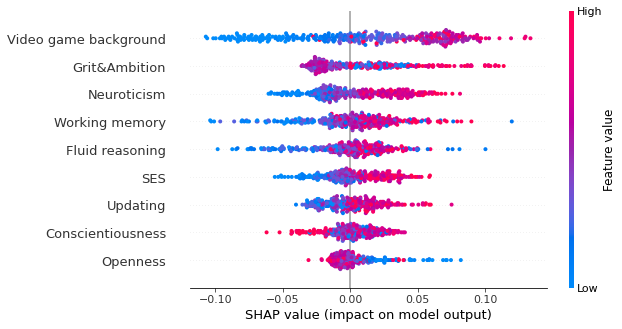

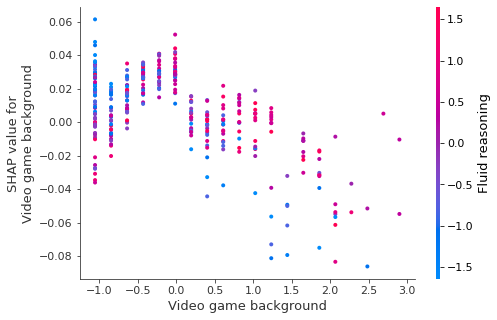

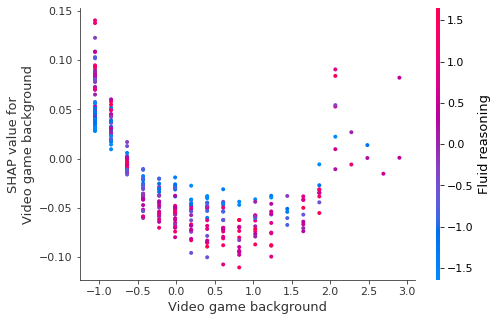

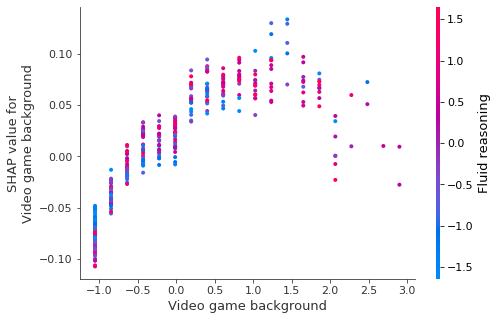

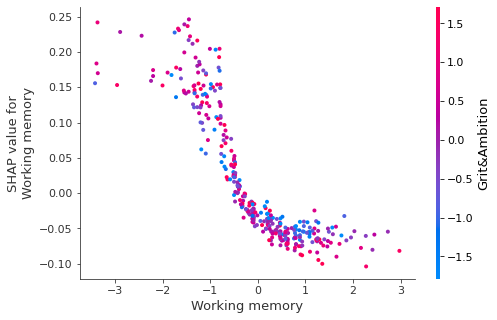

In [ ]:
classify_test.shap_tree('Random Forest',data_path)

In [ ]:
# shap_all, expected_shap = clf.read_inputs(data_path,['shap_values.data','shap_expected.data'])
# classify_test.shap_visualize(shap_all, expected_shap, final_accuracies, final_pred_y, False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b8ead81-70bf-4d6b-bd50-8194f8f72b46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>